In [1]:
import sys
import os
from pathlib import Path
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

os.chdir('..')

from utils.meta_util import load_meta_infos, collect_by, filter_by
from utils.tensor_holders import TensorHolder
from utils.plot_util import plot, legend

plot_dir = Path('notebooks')
losses_label = '$mc_estimator$ $sample_size$ sample(s)'

## Load results

In [2]:
from pprint import pprint
results = load_meta_infos(Path('results'))
pprint(results)

[{'batch_size': 32,
  'compute_perf': True,
  'compute_variance': True,
  'dataset': 'cancer',
  'device': 'cuda',
  'distribution': 'MultivariateNormal',
  'epochs': 20,
  'learning_rate': 0.001,
  'mc_estimator': 'MVD',
  'path': 'results\\logreg\\cancer\\MVD\\1\\2930489',
  'plot_label': '$mc_estimator$ $sample_size$ sample(s)',
  'revision': 'ea20c6257de58f29be80cd4fbd574dac2008451d',
  'sample_size': 1,
  'saved_metrics': ['train_loss',
                    'test_loss',
                    'estimator_times',
                    'estimators_stds'],
  'seed': 2930489,
  'subpath_keys': ['mc_estimator', 'sample_size'],
  'task': 'logreg'},
 {'batch_size': 32,
  'compute_perf': True,
  'compute_variance': True,
  'dataset': 'cancer',
  'device': 'cuda',
  'distribution': 'MultivariateNormal',
  'epochs': 20,
  'learning_rate': 0.001,
  'mc_estimator': 'MVD',
  'path': 'results\\logreg\\cancer\\MVD\\1\\4063329',
  'plot_label': '$mc_estimator$ $sample_size$ sample(s)',
  'revision': 'ea

  'hidden_dims': [400],
  'latent_dim': 20,
  'learning_rate': 0.001,
  'mc_estimator': 'Pathwise',
  'path': 'results\\vae\\mnist\\Pathwise\\80\\16403198',
  'plot_label': '$mc_estimator$ $sample_size$ sample(s)',
  'revision': 'ea20c6257de58f29be80cd4fbd574dac2008451d',
  'sample_size': 80,
  'saved_metrics': ['train_loss',
                    'test_loss',
                    'estimator_times',
                    'estimators_stds'],
  'seed': 16403198,
  'subpath_keys': ['mc_estimator', 'sample_size'],
  'task': 'vae',
  'vae_type': 'fc'},
 {'batch_size': 128,
  'compute_perf': True,
  'compute_variance': True,
  'dataset': 'MNIST',
  'device': 'cuda',
  'distribution': 'MultivariateNormal',
  'epochs': 10,
  'hidden_dims': [400],
  'latent_dim': 20,
  'learning_rate': 0.001,
  'mc_estimator': 'Pathwise',
  'path': 'results\\vae\\mnist\\Pathwise\\80\\23478912',
  'plot_label': '$mc_estimator$ $sample_size$ sample(s)',
  'revision': 'ea20c6257de58f29be80cd4fbd574dac2008451d',
  'samp

# Plot VAE MNIST Test Losses

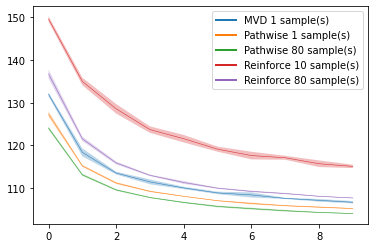

In [3]:
task = 'vae'

test_losses = defaultdict(list)
for k, v in collect_by(filter_by(results, task=task, dataset='mnist'), 'mc_estimator', 'sample_size').items():
    for meta in v:
        test_losses[k].append((meta, TensorHolder.load(meta['path'], 'test_loss')))
test_losses.default_factory = None

for run in test_losses.values():
    meta, _ = run[0]
    losses = []
    for meta, loss in run:
        losses.append(loss.data.numpy().flatten())
    losses = np.array(losses)
    plot(losses.mean(axis=0), losses.std(axis=0), losses_label, meta)

legend()
plt.savefig(plot_dir / f'{task}_test_losses')
plt.show()

# Plot VAE MNIST Train Losses

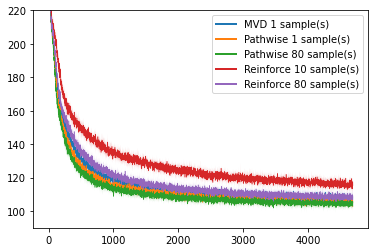

In [4]:
task = 'vae'

test_losses = defaultdict(list)
for k, v in collect_by(filter_by(results, task=task, dataset='mnist'), 'mc_estimator', 'sample_size').items():
    for meta in v:
        test_losses[k].append((meta, TensorHolder.load(meta['path'], 'train_loss')))
test_losses.default_factory = None

for run in test_losses.values():
    meta, _ = run[0]
    losses = []
    for meta, loss in run:
        losses.append(loss.data.numpy().flatten())
    losses = np.array(losses)
    plot(losses.mean(axis=0), losses.std(axis=0), losses_label, meta)

legend()
plt.ylim(90, 220)
plt.savefig(plot_dir / f'{task}_train_losses')
plt.show()

# Plot VAE MNIST Train Losses by process time

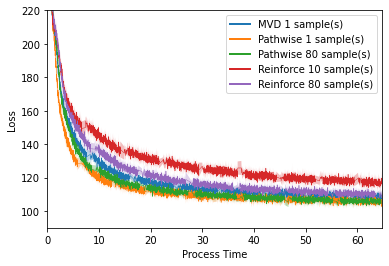

In [5]:
task = 'vae'

test_losses = defaultdict(list)
for k, v in collect_by(filter_by(results, task=task, dataset='mnist'), 'mc_estimator', 'sample_size').items():
    for meta in v:
        test_losses[k].append((meta, TensorHolder.load(meta['path'], 'train_loss')))
test_losses.default_factory = None

shortest_run = float('inf')
for run in test_losses.values():
    meta, _ = run[0]
    losses = []
    timestamps = []
    for meta, loss in run:
        losses.append(loss.data.numpy().flatten())
        run_timestamps = loss.timestamps.numpy().flatten()
        timestamps.append(run_timestamps)
    losses = np.array(losses)
    timestamps = np.array(timestamps)
    timestamps -= np.expand_dims(timestamps[:,0], axis=-1)
    timestamps = timestamps.mean(axis=0)
    shortest_run = min(shortest_run, timestamps[-1])
    plot(losses.mean(axis=0), losses.std(axis=0), losses_label, meta, xspace=timestamps)

legend()
plt.xlabel('Process Time')
plt.ylabel('Loss')
plt.ylim(90, 220)
plt.xlim(0, shortest_run)
plt.savefig(plot_dir / f'{task}_train_timed_losses')
plt.show()

# Plot Logistic Regression Test Loss

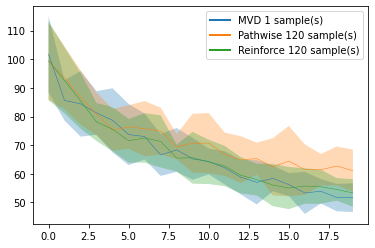

In [6]:
task = 'logreg'

test_losses = defaultdict(list)
for k, v in collect_by(filter_by(results, task=task), 'mc_estimator', 'sample_size').items():
    for meta in v:
        test_losses[k].append((meta, TensorHolder.load(meta['path'], 'test_loss')))
test_losses.default_factory = None

for run in test_losses.values():
    meta, _ = run[0]
    losses = []
    for meta, loss in run:
        losses.append(loss.data.numpy().flatten())
    losses = np.array(losses)
    plot(losses.mean(axis=0), losses.std(axis=0), losses_label, meta)

legend()
plt.savefig(plot_dir / f'{task}_test_losses')
plt.show()

# Plot Logistic Regression Train Loss

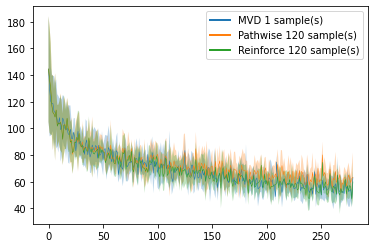

In [7]:
task = 'logreg'

test_losses = defaultdict(list)
for k, v in collect_by(filter_by(results, task=task), 'mc_estimator', 'sample_size').items():
    for meta in v:
        test_losses[k].append((meta, TensorHolder.load(meta['path'], 'train_loss')))
test_losses.default_factory = None

for run in test_losses.values():
    meta, _ = run[0]
    losses = []
    for meta, loss in run:
        losses.append(loss.data.numpy().flatten())
    losses = np.array(losses)
    plot(losses.mean(axis=0), losses.std(axis=0), losses_label, meta)

legend()
plt.savefig(plot_dir / f'{task}_train_losses')
plt.show()